# Data Preprocessing

## Library Imports

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

## Data Imports

In [33]:
sns.get_dataset_names() #these are the datasets present in seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [34]:
tips = sns.load_dataset("tips")

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
tips.day.unique(),tips.time.unique(),tips.smoker.unique(),tips.sex.unique()

(['Sun', 'Sat', 'Thur', 'Fri']
 Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'],
 ['Dinner', 'Lunch']
 Categories (2, object): ['Lunch', 'Dinner'],
 ['No', 'Yes']
 Categories (2, object): ['Yes', 'No'],
 ['Female', 'Male']
 Categories (2, object): ['Male', 'Female'])

## Exploratory Data Analysis

In [37]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [38]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Bivariate graph to show the relationship between Tip and Total bill column 

Text(0.5, 1.0, 'Relation between Tip and Total bill')

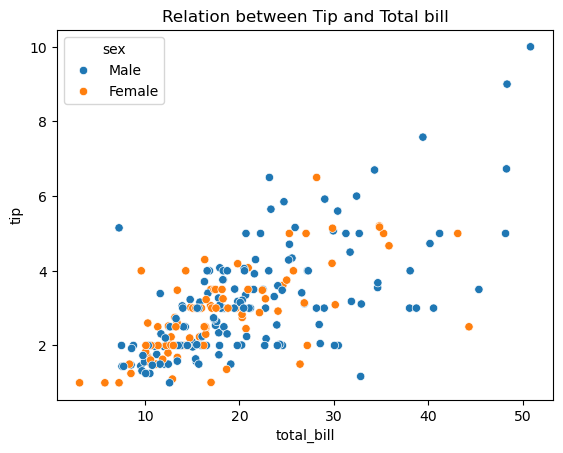

In [39]:
sns.scatterplot(x = "total_bill",y = "tip",data = tips,hue = "sex")
plt.title("Relation between Tip and Total bill")

### Multivariate graph to show the relation between each column

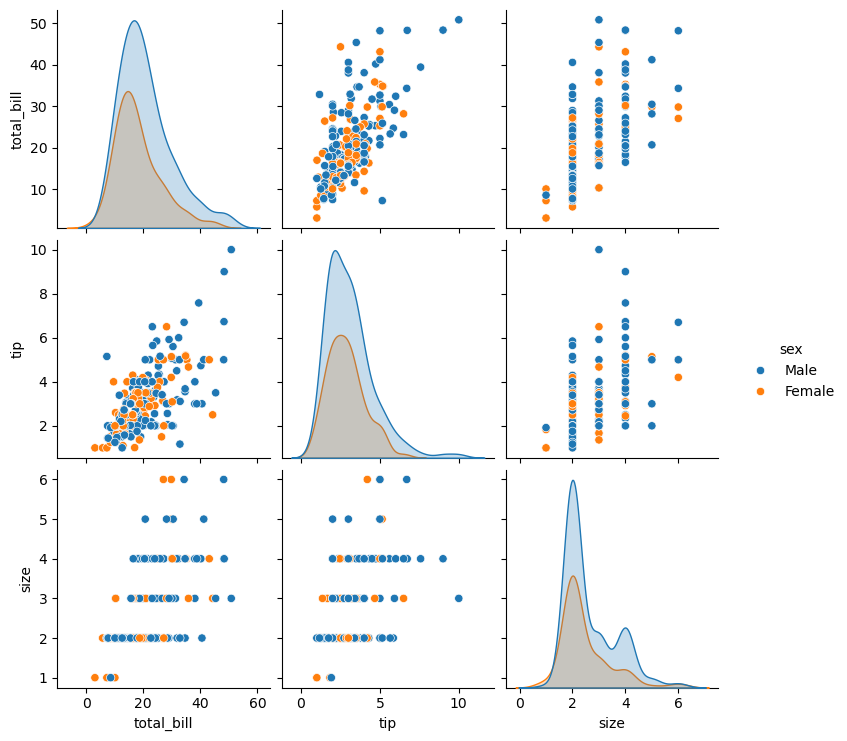

In [40]:
sns.pairplot(tips,hue = "sex")

### Box Plot to show how the distribution of total bills across different days and also we can understand the presence of outliers in each day 

<Axes: xlabel='day', ylabel='total_bill'>

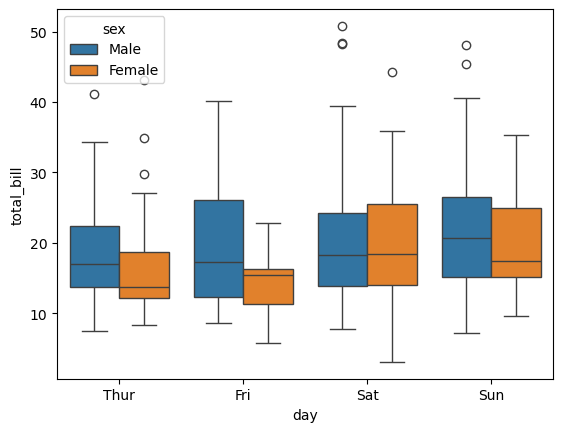

In [41]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)

### In this bivariate graph we can understand that there is a clear positive realationship between the amount of the tip and the total bill ,as the tip increases the total bill also tends to increases

<Axes: xlabel='tip', ylabel='total_bill'>

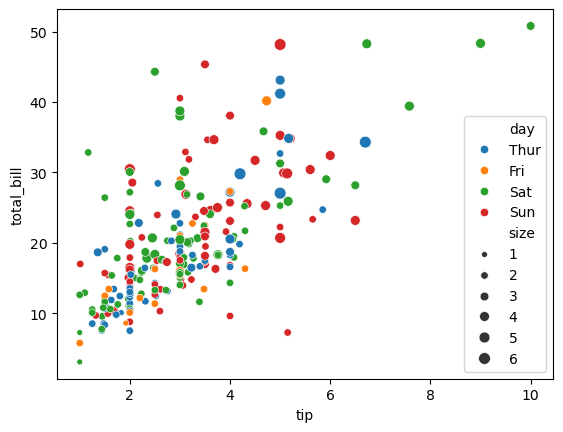

In [42]:
sns.scatterplot(x= "tip",y = "total_bill",data = tips,hue = "day",size = "size")#size parameters describes the size of the points according to column size

## Handling Missing Values

In [43]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Feature Engineering

In [44]:
Encoding = OneHotEncoder(sparse_output=False)

In [45]:
# tips[[ 'Female','Male']]= Encoding.fit_transform(tips[["sex"]]).toarray()
# tips[[ 'Female','Male']]= Encoding.fit_transform(tips[["sex"]]).toarray()
columns = tips.select_dtypes(include = ['category']).columns.tolist()
columns

['sex', 'smoker', 'day', 'time']

In [46]:
encodedData = Encoding.fit_transform(tips[columns])
encodedName = Encoding.get_feature_names_out(columns)#Tells what will be the name creted for this column names
encodedName

array(['sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'day_Fri',
       'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner', 'time_Lunch'],
      dtype=object)

In [47]:
DataframeEnc = pd.DataFrame(encodedData,columns = Encoding.get_feature_names_out(columns))

In [48]:
tips = pd.concat([tips,DataframeEnc],axis = 1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [49]:
tips.drop(["sex","smoker","day","time"],inplace =True,axis = 1)

In [50]:
tips.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Handling Outliers

<Axes: >

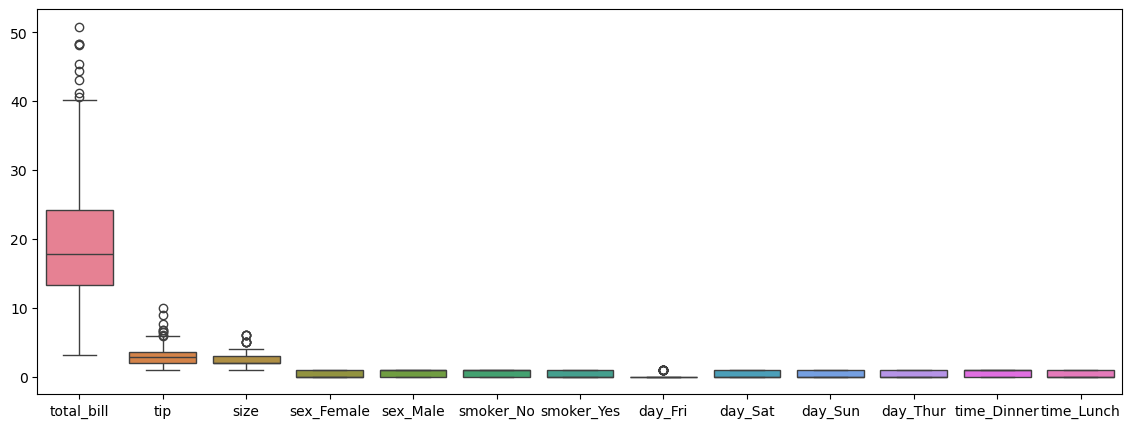

In [51]:
plt.figure(figsize=(14,5))
sns.boxplot(tips)

In [52]:
q1 = tips.total_bill.quantile(0.25)
q3 = tips.total_bill.quantile(0.75)
interquartile_range = q3 - q1
lower_bd = q1 - (1.5*interquartile_range)
upper_bd = q3 + (1.5*interquartile_range)
print(q1,q3,interquartile_range,lower_bd,upper_bd,tips.total_bill.max(),tips.total_bill.min())

13.3475 24.127499999999998 10.779999999999998 -2.8224999999999945 40.29749999999999 50.81 3.07


In [53]:
outlier = []
for i in tips.total_bill:
    if i< lower_bd or i>upper_bd:
        outlier.append(i)
print(outlier)

[48.27, 44.3, 41.19, 48.17, 50.81, 45.35, 40.55, 43.11, 48.33]


In [54]:
totalbillMean = tips.total_bill.mean()
tips.total_bill.replace(outlier,totalbillMean,inplace = True)
tips.total_bill.max()

C:\Users\bavit\AppData\Local\Temp\ipykernel_12028\3109198870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tips.total_bill.replace(outlier,totalbillMean,inplace = True)


40.17

## Data Visualization

<Axes: ylabel='total_bill'>

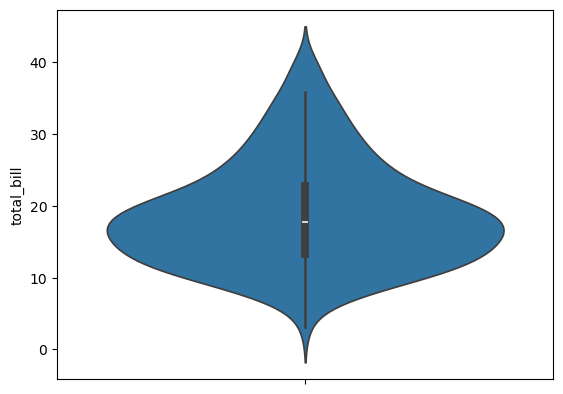

In [55]:
sns.violinplot(tips.total_bill)

In [56]:
tips.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


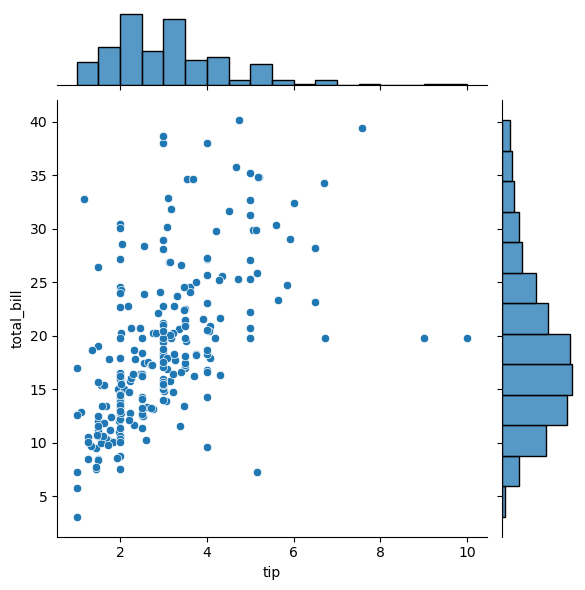

In [57]:
sns.jointplot(x = "tip",y = "total_bill",data = tips)

In [58]:
X = tips.drop(["tip"],axis = 1)
y = tips.tip

# Model Building

## Train Test Split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,y_train.shape

((195, 12), (195,))

## Model Initialization

In [60]:
linearreg = LinearRegression()

In [61]:
rf = RandomForestRegressor(random_state=42)

## Model Training

In [62]:
linearreg.fit(X_train,y_train)

LinearRegression()

## Hyper parameter tunning

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [64]:
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1 
)


In [65]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

## Evaluation and Result

In [66]:
best_rf = random_search.best_estimator_
y_pred1 = best_rf.predict(X_test)

In [67]:
mserror = mean_squared_error(y_test, y_pred1)
print(f"Mean Squared Error: {mserror}")

Mean Squared Error: 1.081963151480431


In [68]:
y_pred = linearreg.predict(X_test)

In [69]:
Accuracy_score = mean_squared_error(y_pred,y_test)
r_2_score = r2_score(y_pred,y_test)
print(f"Mean_Squared_Error : {Accuracy_score} and R2Score : {r_2_score}")

Mean_Squared_Error : 1.177596780566236 and R2Score : -0.9983814844921333


In [70]:
residuals = y_test - y_pred

Text(0.5, 1.0, 'Residual Plot')

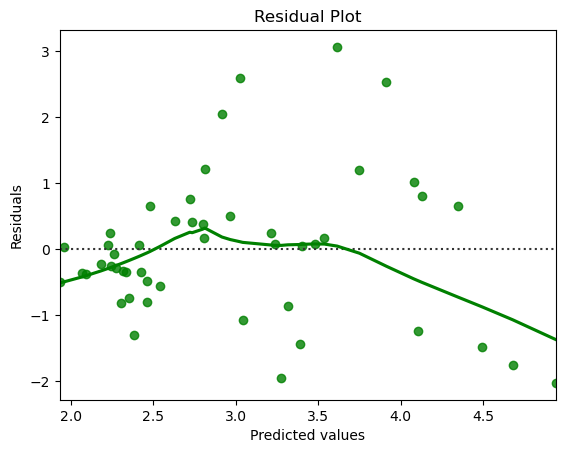

In [71]:
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Actual vs Predicted Plot')

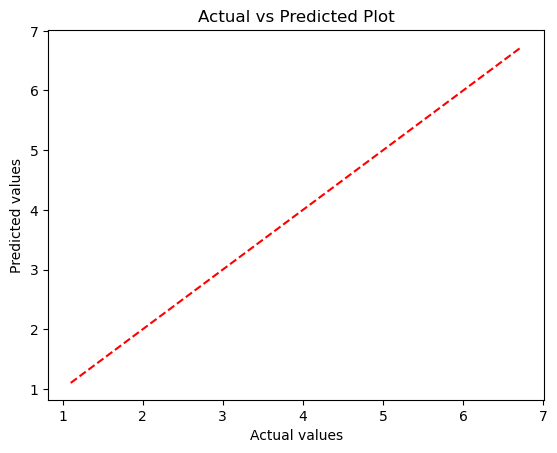

In [72]:
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Plot')

# Errors